# 04 - Writing Structured Programs

Resource: https://www.nltk.org/book/ch04.html

In [1]:
import nltk

In [2]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
words[2], words[3], words[4] = words[3], words[4], words[2]
words

['I', 'turned', 'the', 'spectroroute', 'off']

In [3]:
tmp = words[2]
words[2] = words[3]
words[3] = words[4]
words[4] = tmp
words

['I', 'turned', 'spectroroute', 'off', 'the']

In [4]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noutn', 'verb', 'prep', 'det', 'noun']
list(zip(words, tags))

[('I', 'noutn'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [5]:
list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

In [6]:
def generic(*args, **kwargs):
  print(args, '\n', kwargs, end='\n')

In [7]:
generic(1, "African swallow", monty='python')

(1, 'African swallow') 
 {'monty': 'python'}


In [8]:
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

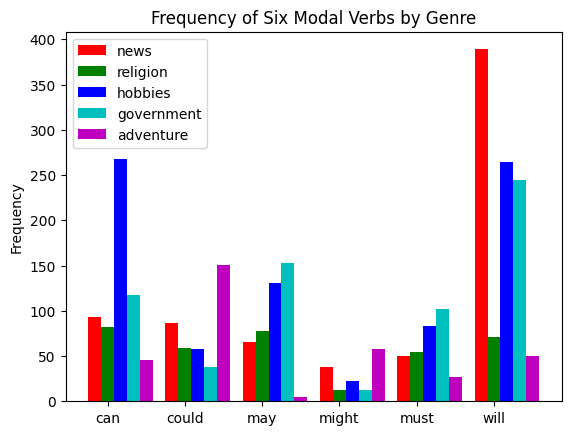

In [9]:
import nltk
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in genres
            for word in nltk.corpus.brown.words(categories=genre)
            if word in modals)

counts = {}
for genre in genres:
     counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    """Recursively traverse the WordNet hyponym tree."""
    distance = node.shortest_path_distance(start) or 0
    graph.add_node(node.name, depth=distance)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    """Create a graph of hyponyms starting from a WordNet synset."""
    G = nx.Graph()
    traverse(G, start, start)
    return G

def graph_draw(graph):
    """Draw the graph using NetworkX and Matplotlib."""
    # Extract depth attribute for node coloring
    depths = nx.get_node_attributes(graph, "depth")
    node_colors = [depths[node] for node in graph.nodes()]
    node_sizes = [50 * graph.degree(node) for node in graph.nodes()]
    
    plt.figure(figsize=(12, 12))
    ax = plt.gca()  # Get the current axes to pass to colorbar
    pos = nx.spring_layout(graph)  # Positioning of nodes
    
    # Draw the graph
    nx.draw(
        graph,
        pos,
        with_labels=False,
        node_size=node_sizes,
        node_color=node_colors,
        cmap=plt.cm.viridis,
        ax=ax,
    )
    
    # Add colorbar to indicate depth of nodes
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    plt.show()

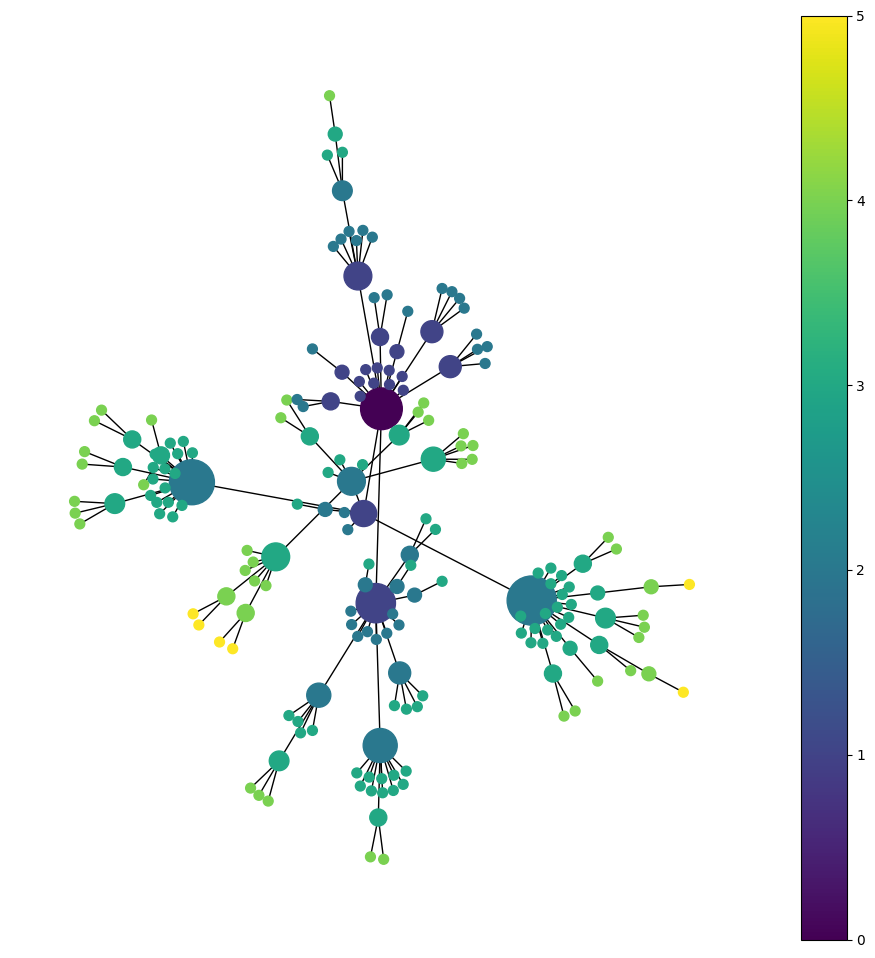

In [13]:
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

In [14]:
from numpy import array
cube = array([
  [[0,0,0], [1,1,1], [2,2,2]],
  [[3,3,3], [4,4,4], [5,5,5]],
  [[6,6,6], [7,7,7], [8,8,8]]
])

print(cube[1,1,1])

4


In [15]:
cube[2].transpose()

array([[6, 7, 8],
       [6, 7, 8],
       [6, 7, 8]])

In [16]:
cube[2,1:]

array([[7, 7, 7],
       [8, 8, 8]])

In [17]:
from numpy import linalg
a=array([[4,0], [3,-5]])
u,s,vt = linalg.svd(a)
u

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])

In [18]:
s

array([6.32455532, 3.16227766])

In [19]:
vt

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])